In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(tr_image, tr_label), (te_image, te_label) = fashion_mnist.load_data()

In [0]:
tr_image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [0]:
tr_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
tr_image.shape

(60000, 28, 28)

In [0]:
tr_label.shape

(60000,)

<function matplotlib.pyplot.show>

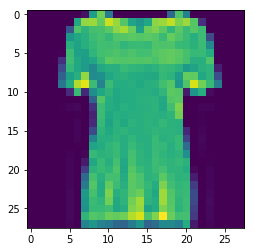

In [0]:
plt.figure()
plt.imshow(tr_image[10])

plt.show

In [0]:
label_name = ['Top', 'Pants', 'Pullover', 'Dress', 'Coat',
              'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Shoes']

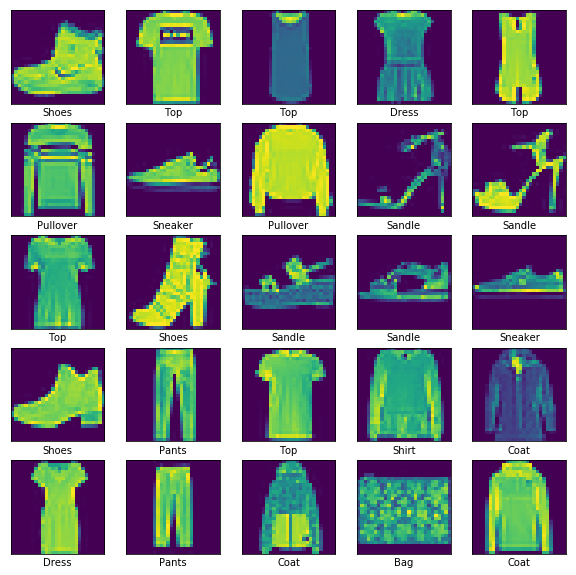

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(tr_image[i])
  plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
tr_image = tr_image.reshape(60000,784).astype('float32') /255.0
te_image = te_image.reshape(10000,784).astype('float32') /255.0

In [0]:
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [0]:
tr_label

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
val_image = tr_image[50000:]
val_label = tr_label[50000:]
tr_image = tr_image[:50000]
tr_label = tr_label[:50000]

In [0]:
tr_label.shape

(700, 10)

In [0]:
tr_rand = np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

tr_image = tr_image[tr_rand]
tr_label = tr_label[tr_rand]
val_image = val_image[val_rand]
val_label = val_label[val]

# 2. 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

# 3. 모델 학습과정 설정하기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

In [0]:
hist = model.fit(tr_image, tr_label, epochs=100, batch_size=32, validation_data=(val_image, val_label))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 397us/step - loss: 2.2753 - acc: 0.1457 - val_loss: 2.1343 - val_acc: 0.2800
Epoch 2/100
700/700 [==============================] - 0s 65us/step - loss: 2.0899 - acc: 0.3114 - val_loss: 1.9763 - val_acc: 0.3567
Epoch 3/100
700/700 [==============================] - 0s 66us/step - loss: 1.9400 - acc: 0.3586 - val_loss: 1.8427 - val_acc: 0.3733
Epoch 4/100
700/700 [==============================] - 0s 84us/step - loss: 1.8006 - acc: 0.4129 - val_loss: 1.6986 - val_acc: 0.4133
Epoch 5/100
700/700 [==============================] - 0s 85us/step - loss: 1.6632 - acc: 0.4643 - val_loss: 1.5833 - val_acc: 0.4967
Epoch 6/100
700/700 [==============================] - 0s 74us/step - loss: 1.5296 - acc: 0.5657 - val_loss: 1.4409 - val_acc: 0.5633
Epoch 7/100
700/700 [==============================] - 0s 66us/step - loss: 1.4164 - acc: 0.5971 - val_loss: 1.3498 - val_acc: 0.5567
Epoch 8/100
700

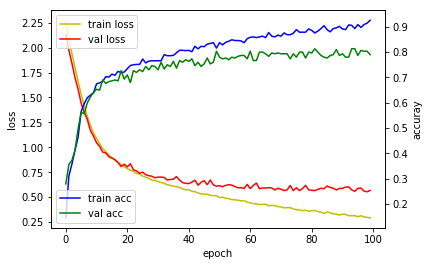

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label = 'val acc')

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.2753414358411517, 2.089873181751796, 1.9399850695473808, 1.8006054108483451, 1.6631835344859531, 1.5296094369888307, 1.4164363874707904, 1.308307672909328, 1.2221765886034284, 1.1448571579796927, 1.089743482044765, 1.0368614741734097, 0.9854001045227051, 0.9558277896472386, 0.9240082039151873, 0.8968625494412014, 0.86873170035226, 0.8495556507791792, 0.8281772787230356, 0.8065720105171204, 0.7853249035562788, 0.771565192426954, 0.7589029945646013, 0.7388658792631967, 0.7308994681494576, 0.7118867874145508, 0.6987483753476824, 0.6890886545181274, 0.6717124373572213, 0.6676649498939514, 0.6575756566865104, 0.6461119082995823, 0.6390532939774649, 0.6235256772381919, 0.6178809983389718, 0.6108781521660941, 0.6041152140072413, 0.597970221723829, 0.5833258986473083, 0.5734176104409354, 0.5737908698831286, 0.5594604522841318, 0.5545204213687351, 0.5425872928755624, 0.5331611835956573, 0.5295938522475107, 0.5291555030005318, 0.5187741049698421, 0.5145228368895395

# 6. 모델 평가하기

In [0]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 24us/step
## evaluation ##
[0.6373294324874877, 0.7766]


# 7. 모델 사용하기

In [0]:
xhat = te_image
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[8.9737805e-06 4.3627197e-06 8.0001691e-06 ... 3.0873159e-01
  4.3939985e-03 3.3611605e-01]
 [8.7012327e-04 1.4644578e-05 9.4944900e-01 ... 1.5135882e-07
  3.3725424e-05 1.4654259e-07]
 [2.4354684e-05 9.9962068e-01 5.5995848e-08 ... 2.7681318e-07
  8.3699394e-09 3.8353807e-08]
 ...
 [1.9316521e-02 5.6621091e-05 4.9823162e-04 ... 1.7889224e-04
  9.0616864e-01 1.6335692e-04]
 [2.7470285e-04 9.8285377e-01 2.1616461e-06 ... 4.2657746e-05
  8.1011342e-07 1.3909022e-05]
 [2.9829590e-04 1.0439558e-03 7.0449477e-04 ... 3.3653188e-01
  6.0225081e-02 4.6622783e-02]]


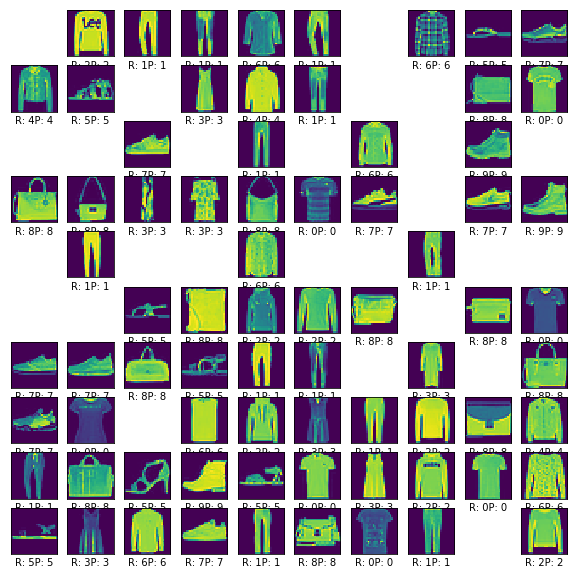

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0

plt.figure(figsize=(10,10))
for i in range(100):
  if np.argmax(te_label[i]) == np.argmax(yhat[i]):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(te_image[i].reshape(28,28))
    plt.xlabel('R: ' + str(np.argmax(te_label[i]))+ 'P: ' + str(np.argmax(yhat[i])))
    i += 1

plt.show()